In [56]:
import pandas as pd
# first step: Loading the Dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
# The shape was used to make sure that all the dataset uploaded successfully or not,
# it returns a tuple of array  tells the number of rows and columns of the given dataset
shape = df.shape
print(f"DataSet shape: {shape}")

DataSet shape: (210165, 17)


In [57]:
# The .info() method was used to get the essential details about the dataset, including the number of rows and columns,
# non-null values, data types for each column, and memory usage of the DataFrame.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [58]:
# The .isnull() method was used to calculate the number of null values in each column of the DataFrame.
missing_values = df.isnull().sum()
print(missing_values)

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Base MSRP                                              5
Legislative District                                 445
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64


In [59]:
# In this step we calculated the percentage of missing values in each column of the DataFrame.
missing_values_percentage = ((missing_values)/ len(df)) * 100
print(missing_values_percentage)

# Counting the number of rows that contains at least one missing value.
print(df.isnull().any(axis=1).sum())
# Calculating the percentage of rows which contains at least one missing value.
print(100*df.isnull().any(axis=1).sum()/df.shape[0],'%')

VIN (1-10)                                           0.000000
County                                               0.001903
City                                                 0.001903
State                                                0.000000
Postal Code                                          0.001903
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.002379
Base MSRP                                            0.002379
Legislative District                                 0.211738
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004758
Electric Utility                                     0.001903
2020 Cen

In [ ]:
#part2: This step was done to Drop any rows in the DataFrame that contain at least one NaN value.
df1 = df.dropna(how='any')
print(df1.isnull().sum())

# Print the number of rows after dropping
print("\n\n<<<Number of rows after dropping rows with all NaN values:", df1.shape[0],">>>\n\n")

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


<<<Number of rows after dropping rows with all NaN

In [ ]:
# part2: Handling missing values using mean/median
import pandas as pd
import seaborn as sns

# Checking missing values before imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Create a copy of the original DataFrame to avoid modifying it, since I need it again.
df2 = df.copy()

# Mean imputation for numerical columns
numeric_columns = ['Electric Range', 'Base MSRP', 'Legislative District', 'Postal Code', '2020 Census Tract']
for column in numeric_columns:
    if df2[column].isnull().sum() > 0:  # Check if there are missing values
        mean_value = df2[column].mean()  # Calculate the mean
        df2[column].fillna(mean_value, inplace=True)  # Fill NaN with mean

# Median imputation for numerical columns that might still have missing values
# This is done to handle outliers
for column in numeric_columns:
    if df2[column].isnull().sum() > 0:  # Check again if there are missing values after mean imputation
        median_value = df2[column].median()  # Calculate the median
        df2[column].fillna(median_value, inplace=True)  # Fill NaN with median

# Mode imputation for categorical columns
categorical_columns = ['County', 'City', 'State', 'Make', 'Model',
                       'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                       'Electric Utility', 'Vehicle Location']  # Included 'Vehicle Location'
for column in categorical_columns:
    if df2[column].isnull().sum() > 0:  # Check if there are missing values
        mode_value = df2[column].mode()[0]  # Get the mode value
        df2[column].fillna(mode_value, inplace=True)  # Fill NaN with mode

# Check the resulting DataFrame
print("Missing values after imputation:")
print(df2.isnull().sum())

Missing values before imputation:
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            5
Model Year                                             1
Make                                                   1
Model                                                  1
Electric Vehicle Type                                  1
Clean Alternative Fuel Vehicle (CAFV) Eligibility      1
Electric Range                                         6
Base MSRP                                              6
Legislative District                                 411
DOL Vehicle ID                                         1
Vehicle Location                                      11
Electric Utility                                       5
2020 Census Tract                                     

<ipython-input-17-f7150c81aa4f>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[column].fillna(mean_value, inplace=True)  # Fill NaN with mean
<ipython-input-17-f7150c81aa4f>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

Missing values after imputation:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           1
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       1
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [60]:
# Part3: One hot encoding
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#working on 'df2' which is without any missing values with 'Make' and 'Model' columns

# Check if 'Make' and 'Model' columns exist in df2
if 'Make' not in df2.columns or 'Model' not in df2.columns:
    raise ValueError("DataFrame df2 must contain 'Make' and 'Model' columns.")

# Create an instance of the OneHotEncoder with 'handle_unknown' set to 'ignore'
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Use sparse_output instead of sparse

# Fit the encoder on both 'Make' and 'Model' columns of the DataFrame
enc.fit(df2[['Make', 'Model']])

# Transform the 'Make' and 'Model' columns into a one-hot encoded array
df_encoded = enc.transform(df2[['Make', 'Model']])

# Create a DataFrame for the one-hot encoded data with appropriate column names
encoded_columns = enc.get_feature_names_out(['Make', 'Model'])
df_encoded_df = pd.DataFrame(df_encoded, columns=encoded_columns)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_ohenc = pd.concat([df2.reset_index(drop=True), df_encoded_df.reset_index(drop=True)], axis=1)

# Drop the original 'Make' and 'Model' columns if they are no longer needed
df_ohenc.drop(columns=['Make', 'Model'], inplace=True)

# Display the first few rows of the new DataFrame
print("DataFrame after One-Hot Encoding:")
print(df_ohenc.head())

DataFrame after One-Hot Encoding:
   VIN (1-10)     County       City State  Postal Code  Model Year  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   

                    Electric Vehicle Type  \
0  Plug-in Hybrid Electric Vehicle (PHEV)   
1          Battery Electric Vehicle (BEV)   
2  Plug-in Hybrid Electric Vehicle (PHEV)   
3          Battery Electric Vehicle (BEV)   
4          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            30.0   
1           Clean Alternative Fuel Vehicle Eligible           215.0   
2             Not eligible due to low battery range          

In [61]:
# part4: Normalization
from sklearn.preprocessing import MinMaxScaler

# Identify numerical features
numerical_features = df2.select_dtypes(include=['float64', 'int64']).columns

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize numerical features
df2[numerical_features] = min_max_scaler.fit_transform(df2[numerical_features])

# Verify normalization
print(df2[numerical_features].describe())

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  210165.000000  210165.000000   210165.000000  210165.000000   
mean        0.985704       0.848025        0.150155       0.001062   
std         0.024992       0.114959        0.258078       0.009057   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.984414       0.769231        0.000000       0.000000   
50%         0.985160       0.884615        0.000000       0.000000   
75%         0.987705       0.923077        0.124629       0.000000   
max         1.000000       1.000000        1.000000       1.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract      Longitude  \
count         210165.000000   210165.000000      210165.000000  210165.000000   
mean               0.581874        0.477982           0.944716       0.423686   
std                0.310263        0.148472           0.028198       0.020407   
min                0.000000        0.000000  

In [62]:
# Part5: Calculate summary statistics [mean,meadian,std] for numerical features
# agg() was used to applie multiple aggregation functions (mean, median, std) to the selected numerical features at the same time.

summary_statistics = df2[numerical_features].agg(['mean', 'median', 'std'])

# Displaying the summary statistics
print("Summary Statistics for Numerical Features:")
print(summary_statistics)

Summary Statistics for Numerical Features:
        Postal Code  Model Year  Electric Range  Base MSRP  \
mean       0.985704    0.848025        0.150155   0.001062   
median     0.985160    0.884615        0.000000   0.000000   
std        0.024992    0.114959        0.258078   0.009057   

        Legislative District  DOL Vehicle ID  2020 Census Tract  Longitude  \
mean                0.581874        0.477982           0.944716   0.423686   
median              0.645833        0.501850           0.945693   0.420629   
std                 0.310263        0.148472           0.028198   0.020407   

        Latitude  
mean    0.657554  
median  0.661814  
std     0.020053  


   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA     0.987766    0.846154      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA     0.987664    0.730769    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA     0.984005    0.653846  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA     0.987051    0.730769    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA     0.984414    0.769231   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible        0.089021   
1           Clean Alternative Fuel Vehicle Eligible 

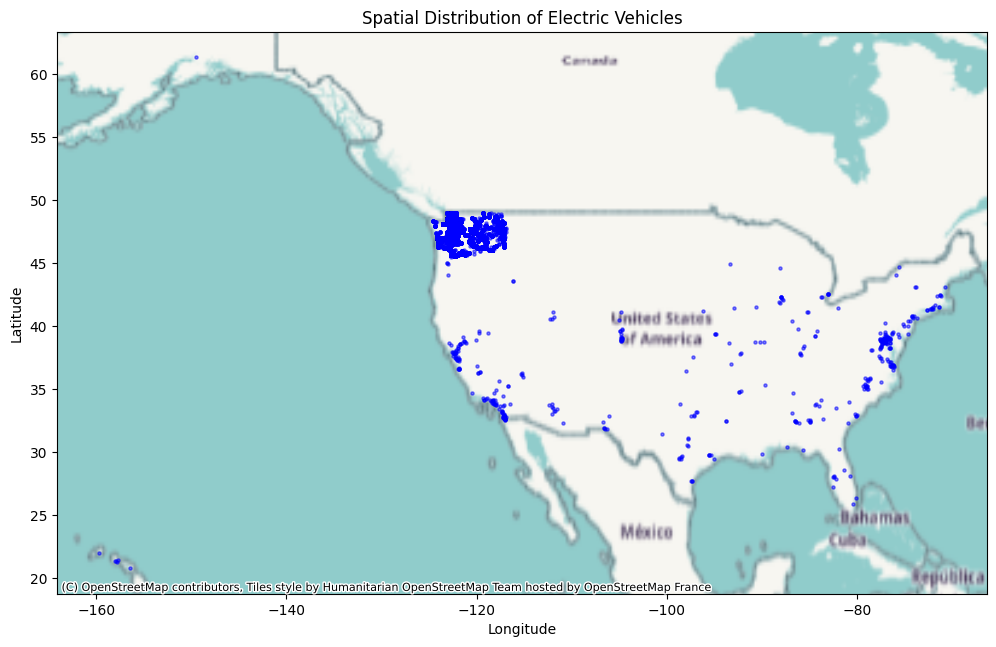

In [65]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx



# Check the first few rows to ensure data is loaded correctly
print(df2.head())

# Extract Longitude and Latitude from the 'Vehicle Location' column
df2['Longitude'] = df2['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)')[0].astype(float)
df2['Latitude'] = df2['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)')[1].astype(float)

# Create geometry from the extracted coordinates
geometry = gpd.points_from_xy(df2['Longitude'], df2['Latitude'])
gdf = gpd.GeoDataFrame(df2, geometry=geometry)

# Set the Coordinate Reference System (CRS) to WGS84
gdf.crs = "EPSG:4326"

# Create a base plot
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, color='blue', markersize=5, alpha=0.5)
ctx.add_basemap(ax, crs=gdf.crs.to_string())
ax.set_title('Spatial Distribution of Electric Vehicles')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


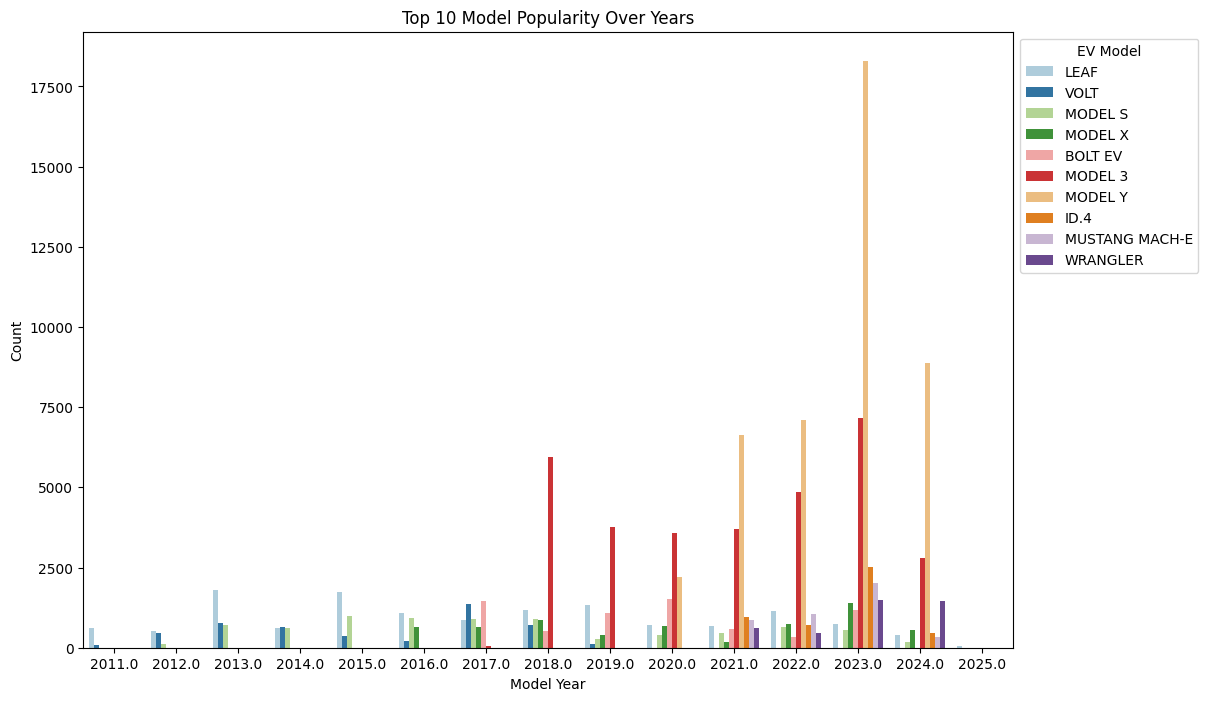

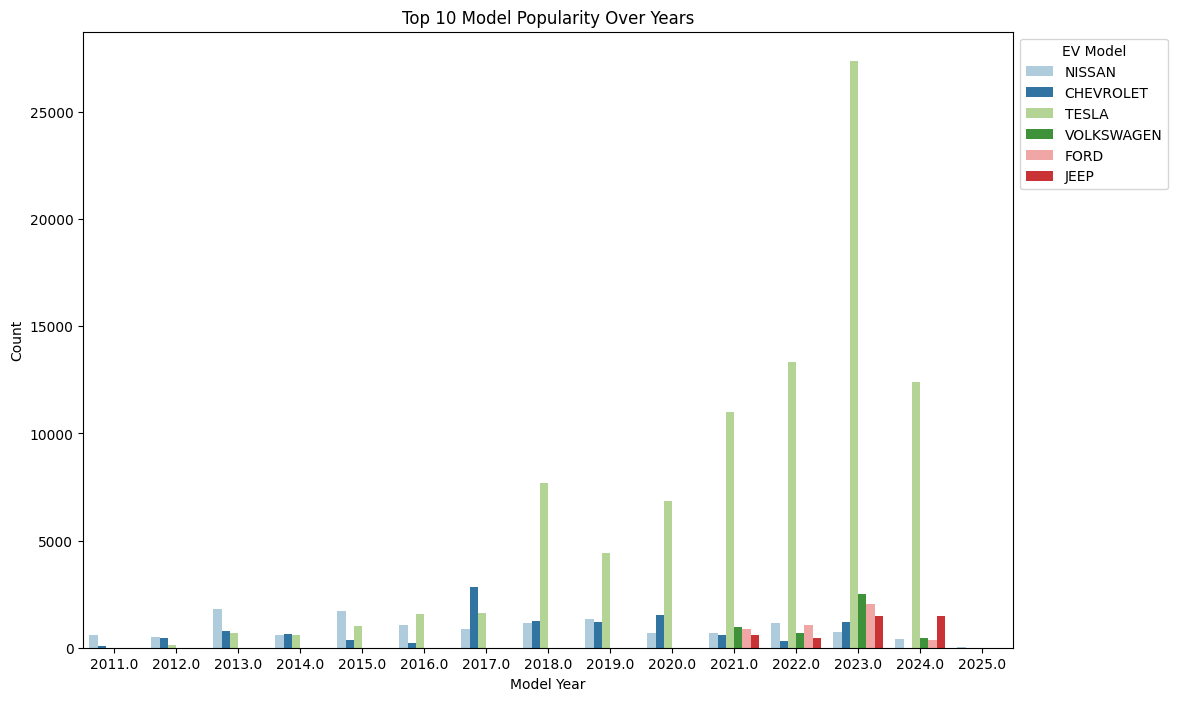

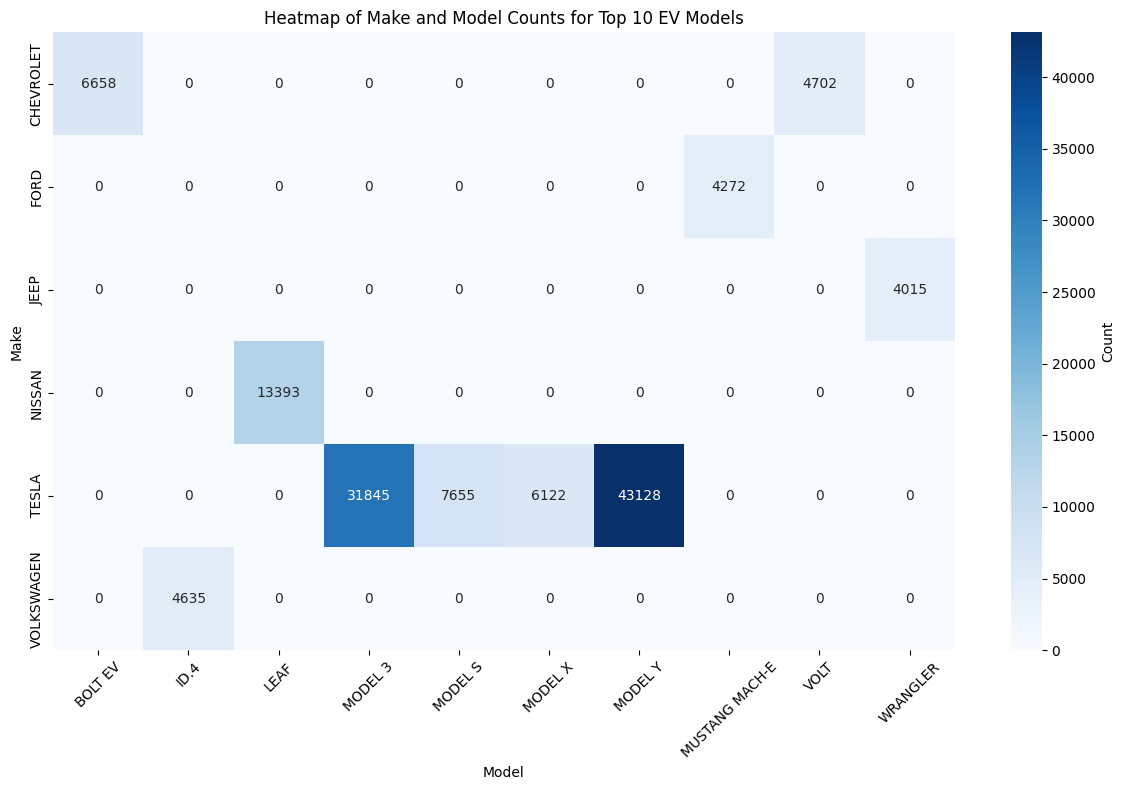

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Identify the top 10 models by popularity

top_10_models = df['Model'].value_counts().head(10).index
df_top_10 = df[df['Model'].isin(top_10_models)]
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_10, x='Model Year', hue='Model', palette="Paired")
plt.title("Top 10 Model Popularity Over Years")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.legend(title="EV Model", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

top_10_models = df['Model'].value_counts().head(10).index
df_top_10 = df[df['Model'].isin(top_10_models)]
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_10, x='Model Year', hue='Make', palette="Paired")
plt.title("Top 10 Model Popularity Over Years")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.legend(title="EV Model", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Create a pivot table to count occurrences of each Make-Model combination
make_model_counts = df_top_10.pivot_table(index='Make', columns='Model', aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(make_model_counts, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'})
plt.title("Heatmap of Make and Model Counts for Top 10 EV Models")
plt.xlabel("Model")
plt.ylabel("Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

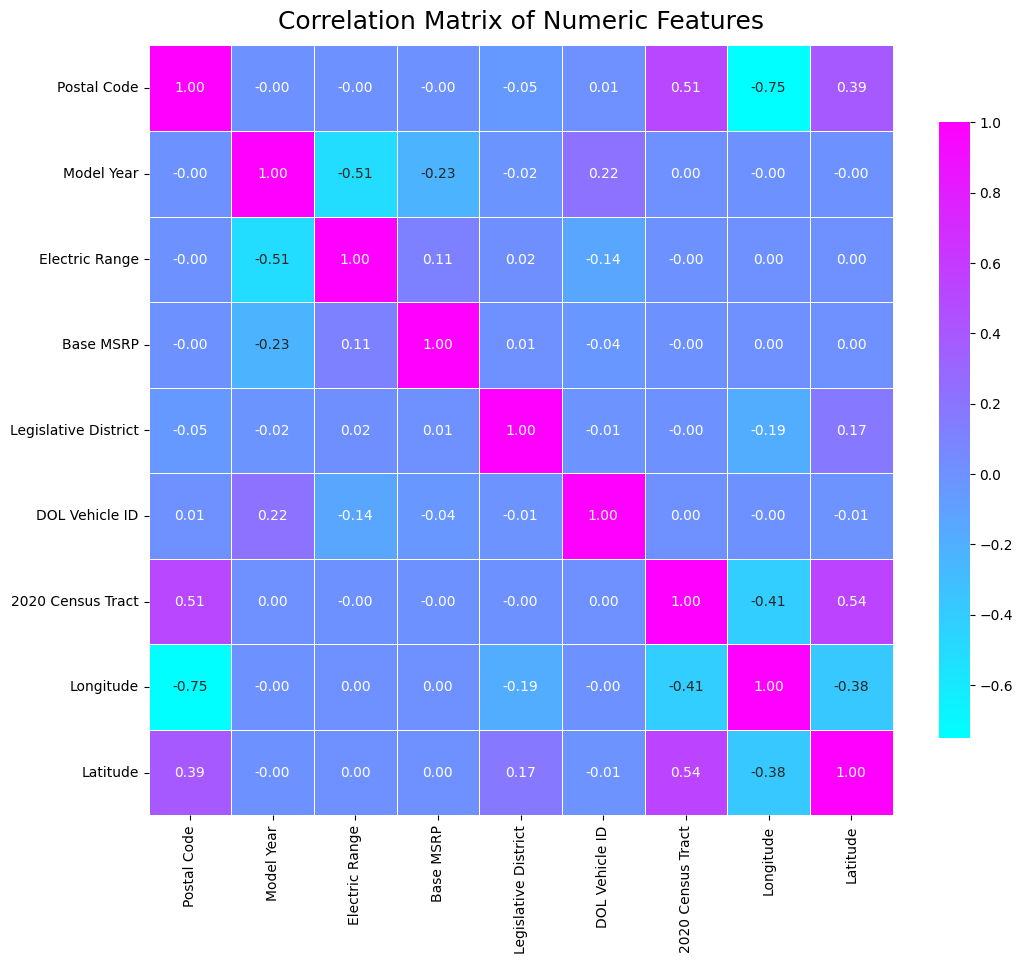

In [68]:
# part 8:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features (float64, int64)
numeric_df = df2.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap for the correlation matrix with a cool color palette
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,               # Display the correlation values
    cmap="cool",             # Changed color map to 'cool'
    fmt=".2f",               # Format for the annotation
    linewidths=0.5,          # Width of the lines separating the cells
    cbar_kws={"shrink": .8}  # Color bar size adjustment
)

# Set title and display the plot
heatmap.set_title("Correlation Matrix of Numeric Features", fontdict={'fontsize':18}, pad=12)
plt.show()

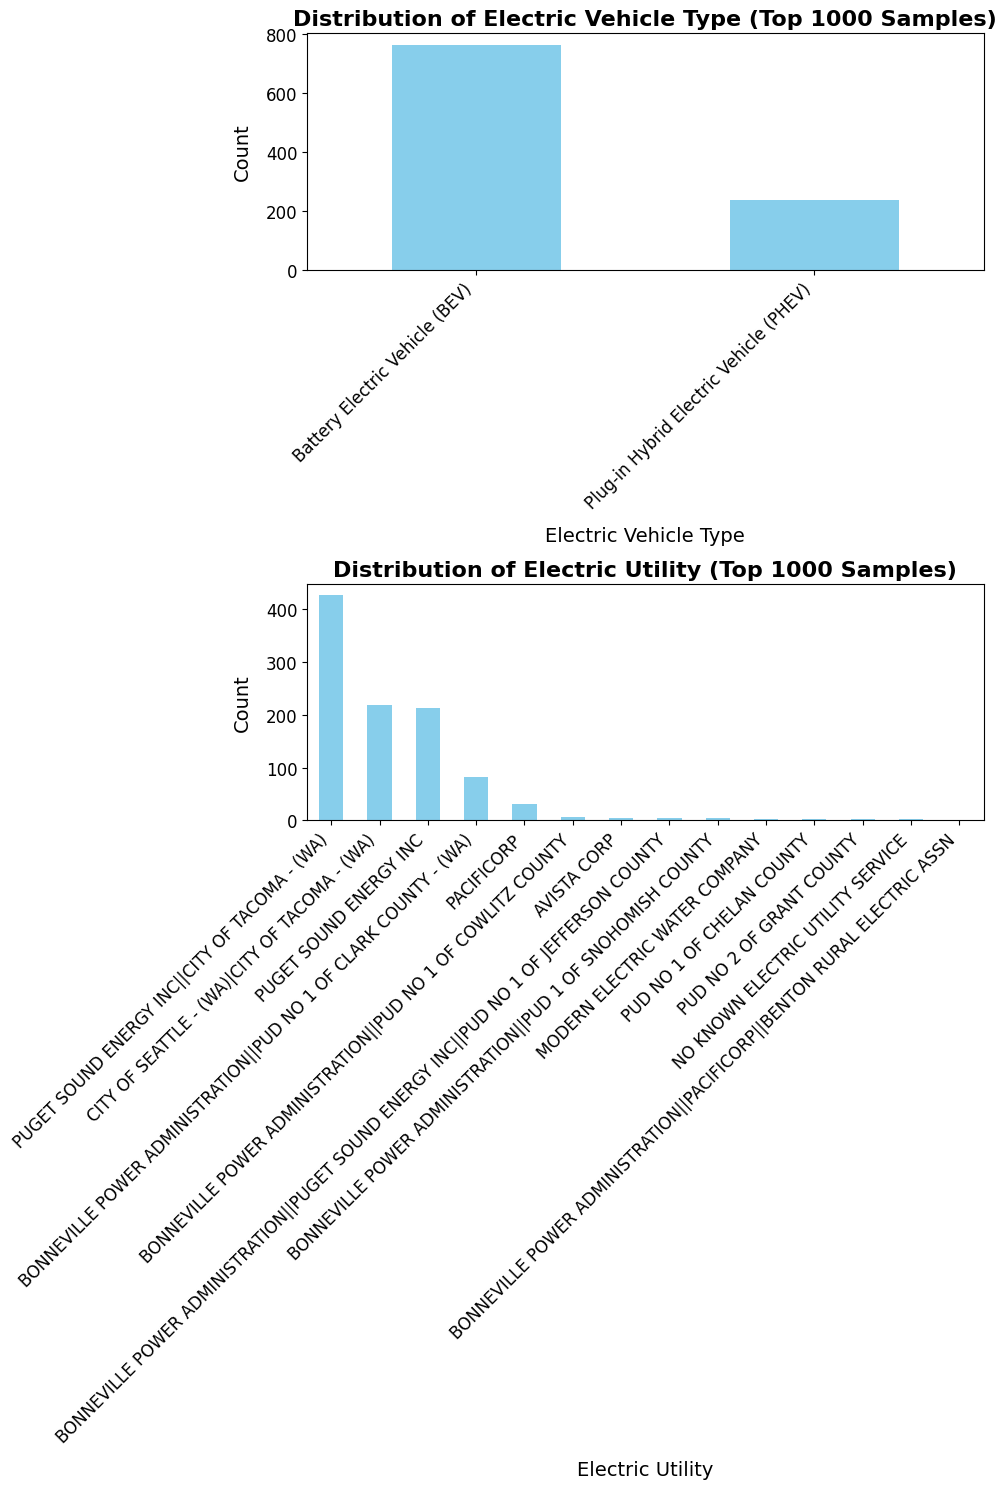

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the top 1000 samples (or adjust as needed)
df_top15 = df2.head(1000)

# Define the categorical columns to plot
categorical_columns = [
    'Electric Vehicle Type',
    'Electric Utility',

]

# Set the figure size for better spacing and visibility
plt.figure(figsize=(10, 15))  # Keeping the original figure size

# Plot each categorical feature as a histogram
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)  # Arrange in a single column
    df_top15[column].value_counts().plot(kind='bar', color='skyblue')

    # Update labels and title for better readability
    plt.title(f'Distribution of {column} (Top 1000 Samples)', fontsize=16, weight='bold')
    plt.xlabel(column, fontsize=14, labelpad=10)
    plt.ylabel('Count', fontsize=14, labelpad=10)

    # Rotate x-axis labels for readability and adjust font size
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

# Adjust spacing between plots without changing figure size
plt.subplots_adjust(hspace=0.8)  # Increased space between plots

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


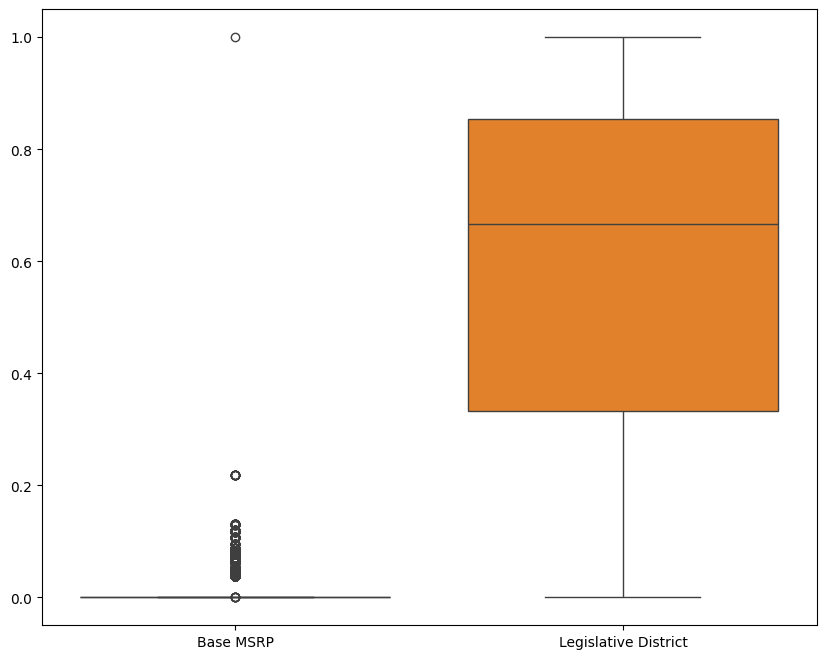

(205936, 17)

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df2[["County","Electric Vehicle Type","Base MSRP","Legislative District","Clean Alternative Fuel Vehicle (CAFV) Eligibility"]])
plt.show()
df2.shape

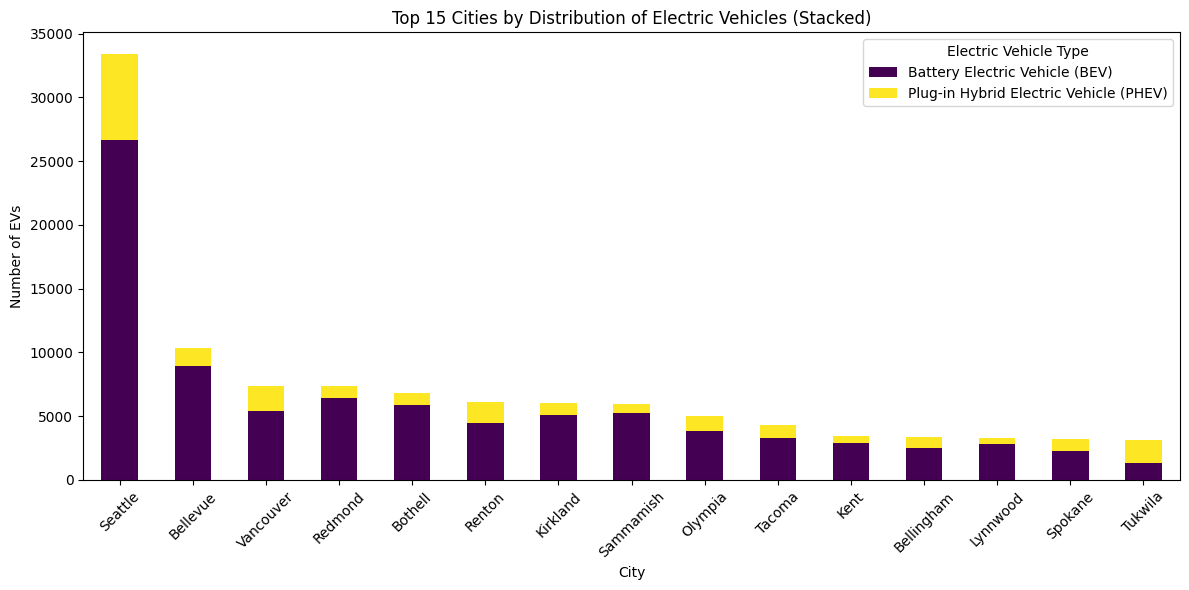

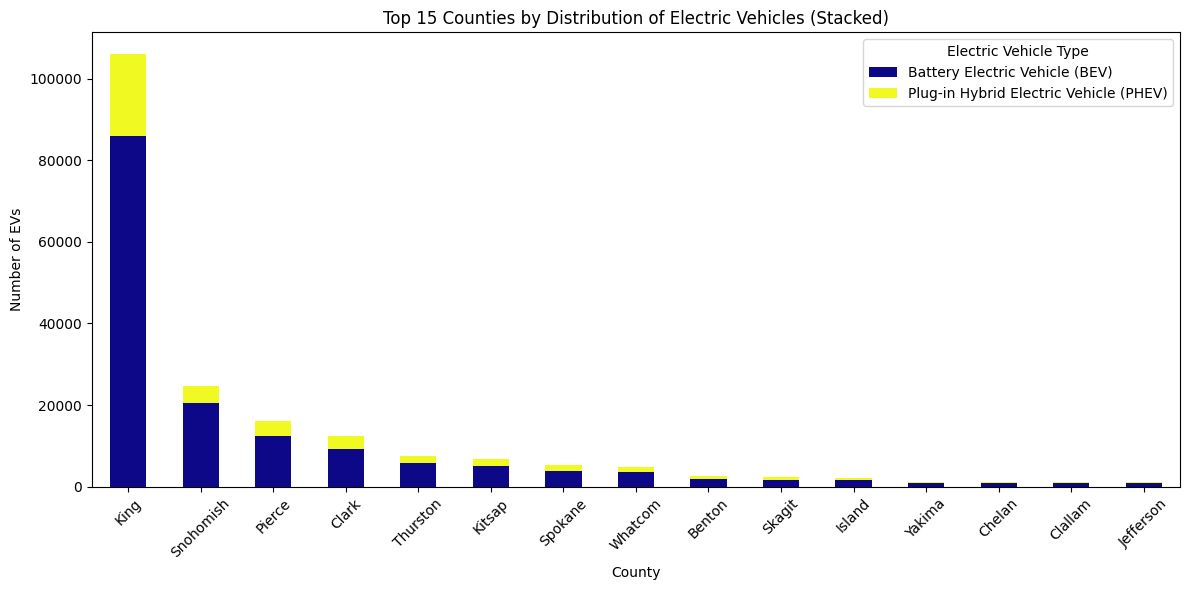

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (df2) - ensure it's already defined in your code
# df2 = pd.read_csv('path_to_your_data.csv')  # Uncomment if loading from a file

# Prepare data for stacked bar chart by City
city_stacked_data = df2.groupby(['City', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Sum the number of EVs for each city and sort to get the top 15
top_cities = city_stacked_data.sum(axis=1).nlargest(15).index
city_stacked_data = city_stacked_data.loc[top_cities]

# Plotting the stacked bar chart for Top 15 Cities
city_stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Top 15 Cities by Distribution of Electric Vehicles (Stacked)')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()

# Prepare data for stacked bar chart by County
county_stacked_data = df2.groupby(['County', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Sum the number of EVs for each county and sort to get the top 15
top_counties = county_stacked_data.sum(axis=1).nlargest(15).index
county_stacked_data = county_stacked_data.loc[top_counties]

# Plotting the stacked bar chart for Top 15 Counties
county_stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Top 15 Counties by Distribution of Electric Vehicles (Stacked)')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()